In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/concrete-compressive-strength-data-set/concrete_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/concrete-compressive-strength-data-set/concrete_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
df.head()

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30

# EDA

### ```concrete_compressive_strength```

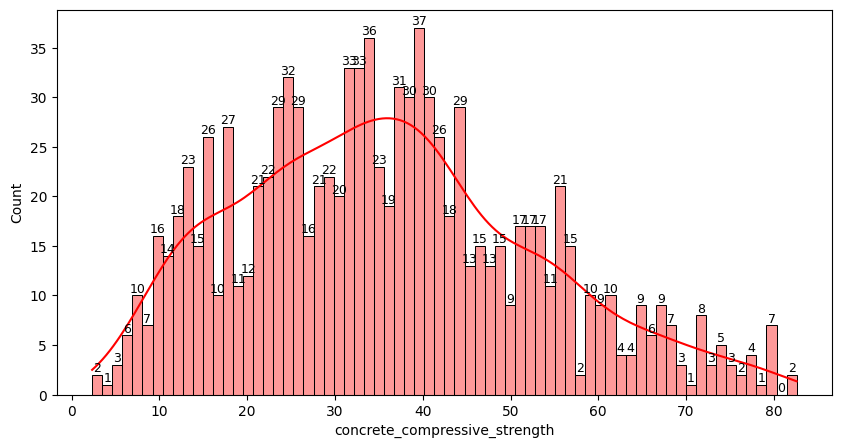

In [4]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="concrete_compressive_strength", kde=True, bins = 70, color ="red", alpha = 0.4)
ax.bar_label(ax.containers[0], fontsize=9);

### ```cement```

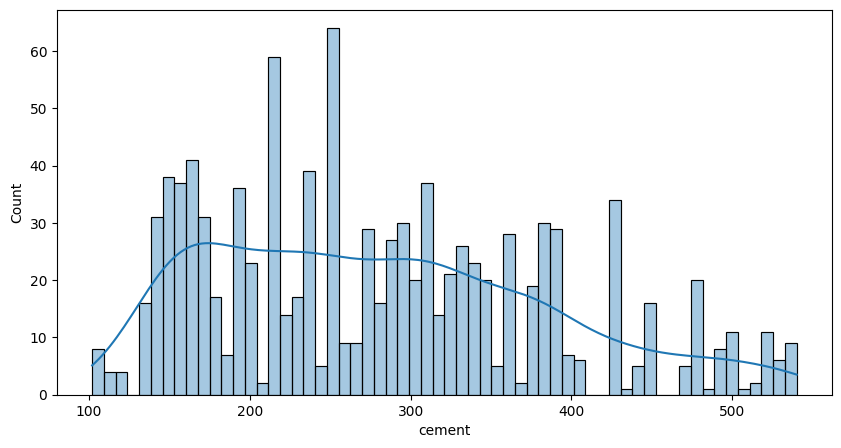

In [5]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="cement", kde=True, bins = 60, alpha = 0.4)
ax.bar_label(ax.containers[0], fontsize=10);

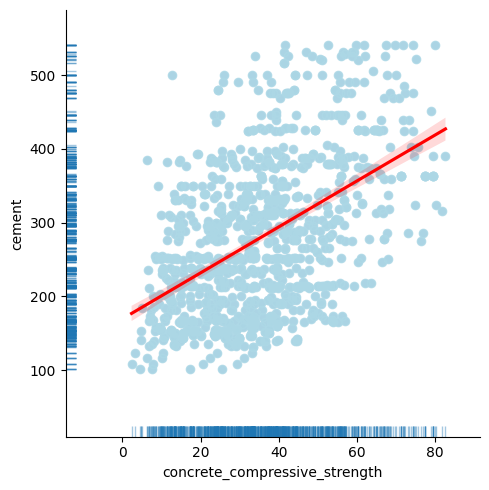

In [6]:
ax = sns.relplot(df, x="concrete_compressive_strength", y="cement",  alpha = 0.4)
ax = sns.rugplot(df, x="concrete_compressive_strength", y="cement",  alpha = 0.4)
ax = sns.regplot(data=df, x="concrete_compressive_strength", y="cement", 
                 scatter_kws={"color": "lightblue"}, line_kws={"color": "red"})
plt.show()

<Figure size 1000x1000 with 0 Axes>

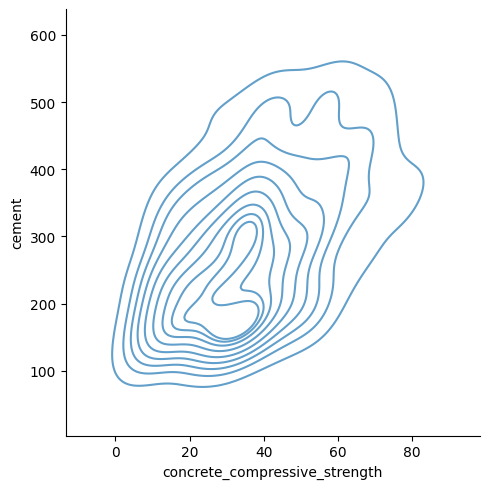

In [7]:
plt.figure(figsize=(10, 10))
sns.displot(df, x="concrete_compressive_strength", y="cement", kind="kde", alpha = 0.7,)

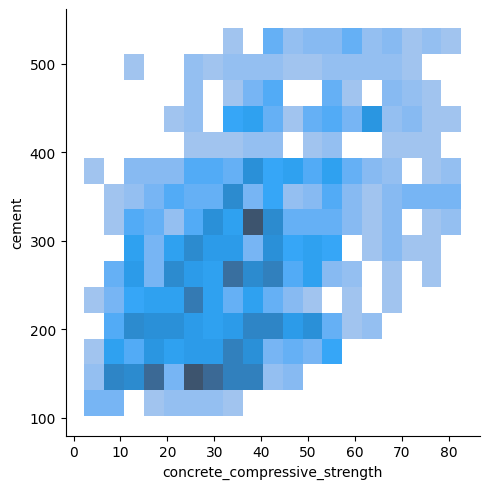

In [8]:
sns.displot(df, x="concrete_compressive_strength", y="cement")

### ``` blast_furnace_slag```

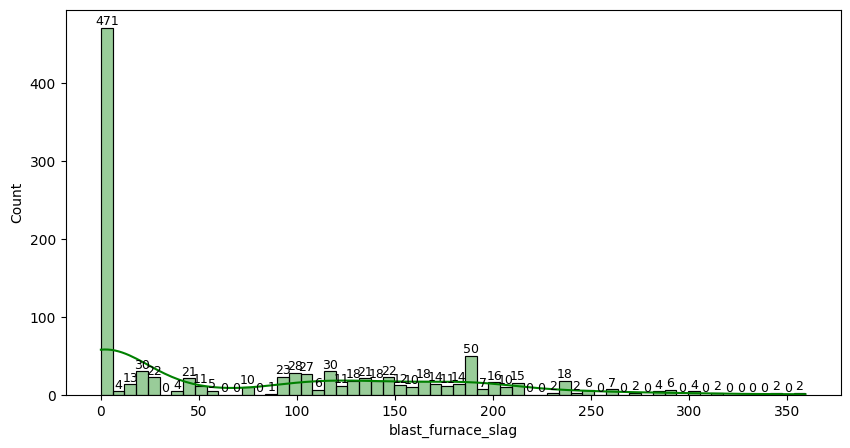

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="blast_furnace_slag", kde=True, bins = 60, color ="green", alpha = 0.4)
ax.bar_label(ax.containers[0], fontsize=9); 

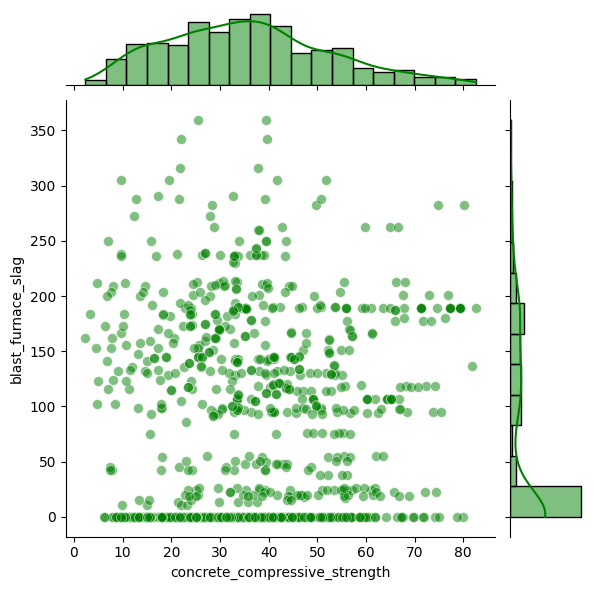

In [10]:
g = sns.JointGrid(data=df, x="concrete_compressive_strength", y="blast_furnace_slag")
g.plot_joint(sns.scatterplot, s=50, alpha=.5, color ="green")
g.plot_marginals(sns.histplot, kde=True, color ="green")

### ``` fly_ash```

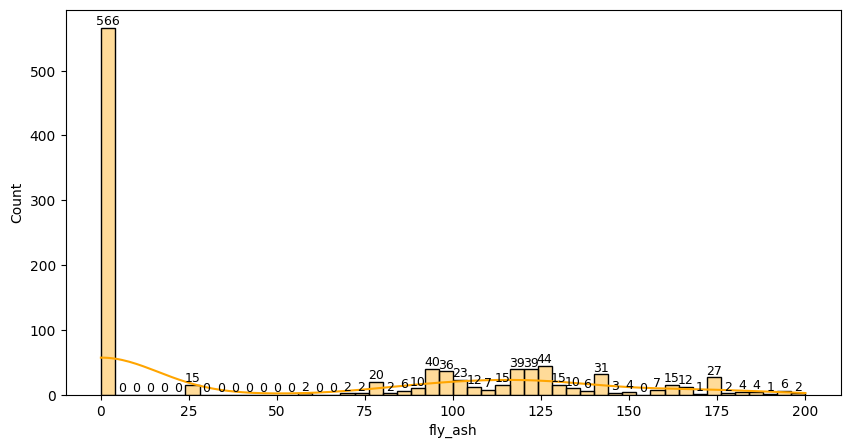

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="fly_ash", kde=True, bins = 50, color ="orange", alpha = 0.4)
ax.bar_label(ax.containers[0], fontsize=9); 

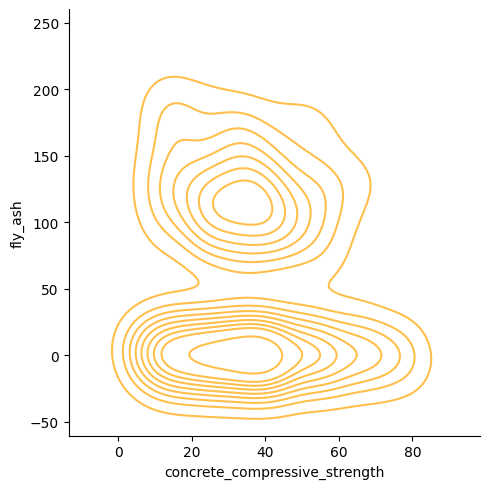

In [12]:
sns.displot(df, x="concrete_compressive_strength", y="fly_ash", kind="kde", color = "orange", alpha = 0.7,)

### ``` water```

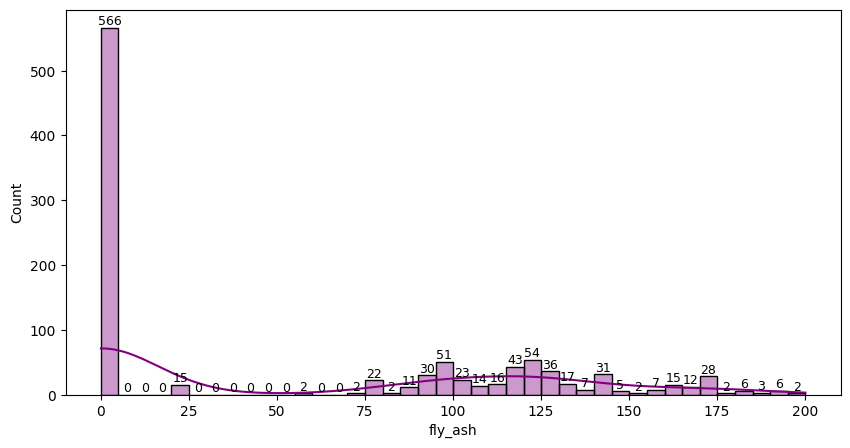

In [13]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="fly_ash", kde=True, bins = 40, color ="purple", alpha = 0.4)
ax.bar_label(ax.containers[0], fontsize=9); 

<Axes: xlabel='concrete_compressive_strength', ylabel='fly_ash'>

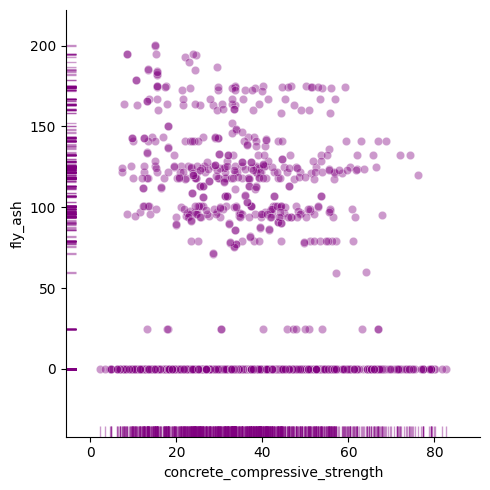

In [14]:
sns.relplot(df, x="concrete_compressive_strength", y="fly_ash", color ="purple", alpha = 0.4)
sns.rugplot(df, x="concrete_compressive_strength", y="fly_ash", color ="purple", alpha = 0.4)

### ``` superplasticizer```

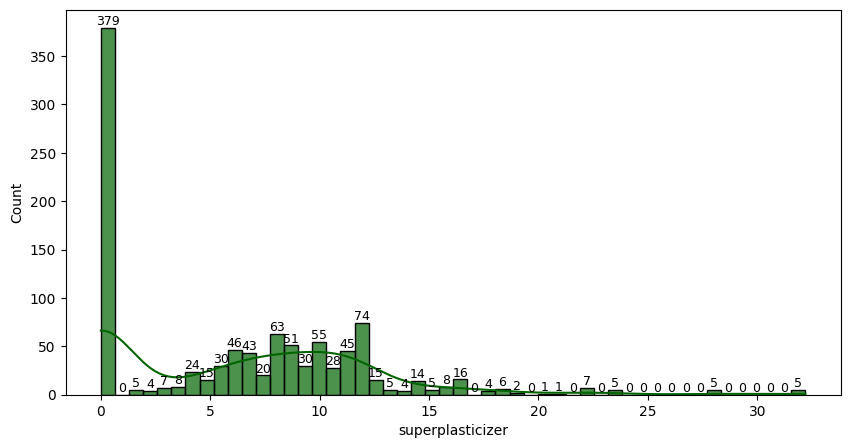

In [15]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="superplasticizer", kde=True, bins = 50, color ="darkgreen", alpha = 0.7)
ax.bar_label(ax.containers[0], fontsize=9); 

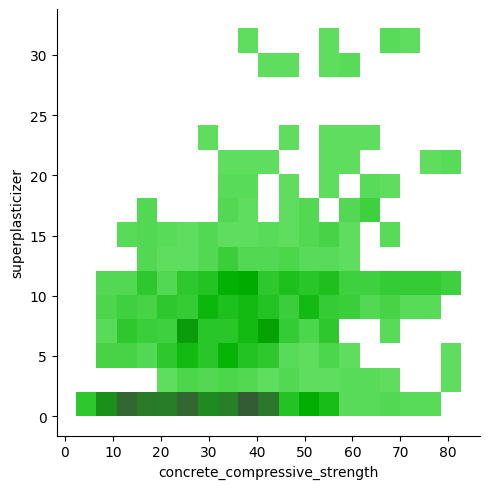

In [16]:
sns.displot(df, x="concrete_compressive_strength", y="superplasticizer", color ="darkgreen")

### ``` coarse_aggregate```

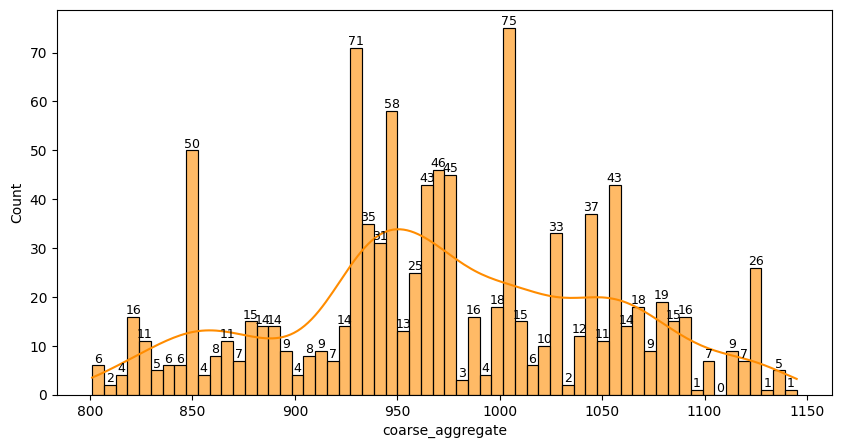

In [17]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="coarse_aggregate", kde=True, bins = 60, color ="darkorange", alpha = 0.6)
ax.bar_label(ax.containers[0], fontsize=9); 

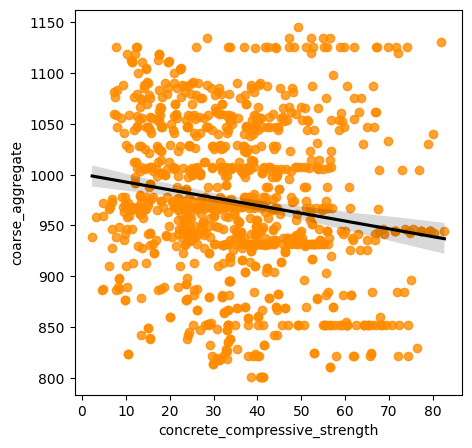

In [18]:
plt.figure(figsize=(5, 5))
ax = sns.regplot(data=df, x="concrete_compressive_strength", y="coarse_aggregate", 
                 scatter_kws={"color": "darkorange"}, line_kws={"color": "black"})
plt.show()

### ``` fine_aggregate```

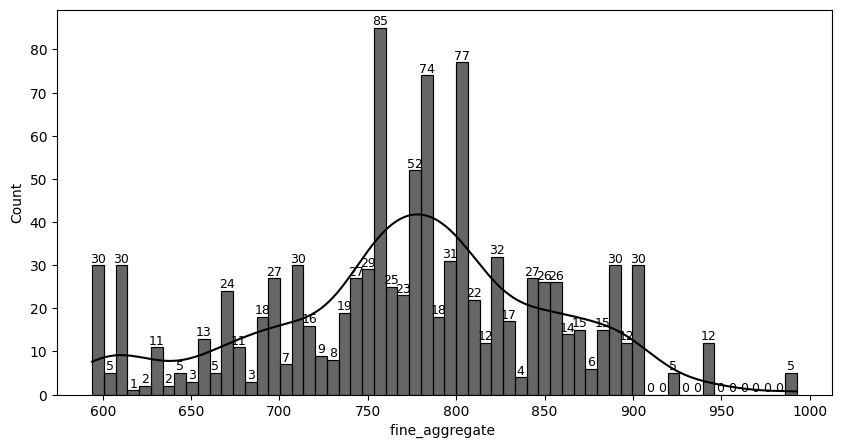

In [19]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(x= df.iloc[:,6], kde=True, bins = 60, color ="black", alpha = 0.6)
ax.bar_label(ax.containers[0], fontsize=9); 

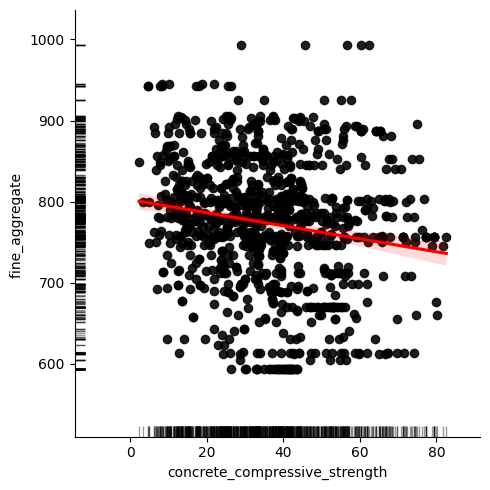

In [20]:
ax = sns.relplot(df, x="concrete_compressive_strength", y=df.iloc[:,6], color ="black", alpha = 0.4)
ax = sns.rugplot(df, x="concrete_compressive_strength", y=df.iloc[:,6], color ="black", alpha = 0.4)
ax = sns.regplot(data=df, x="concrete_compressive_strength", y=df.iloc[:,6], 
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.show()

### ``` age```

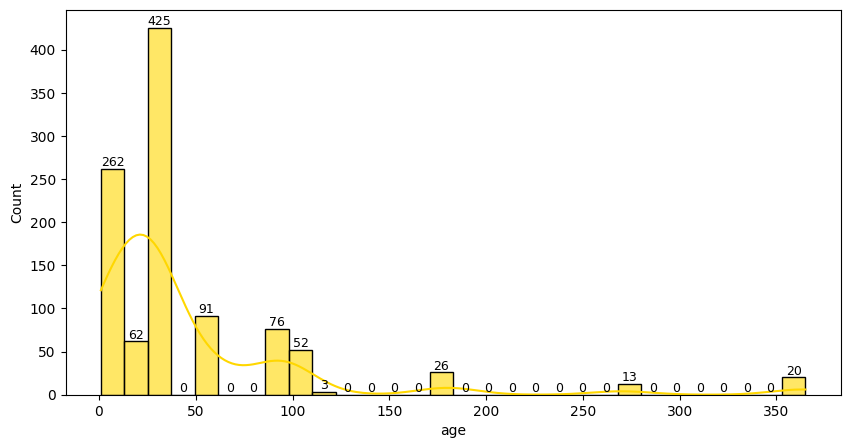

In [21]:
plt.figure(figsize=(10, 5))
ax = sns.histplot(df, x="age", kde=True, bins = 30, color ="gold", alpha = 0.6)
ax.bar_label(ax.containers[0], fontsize=9); 

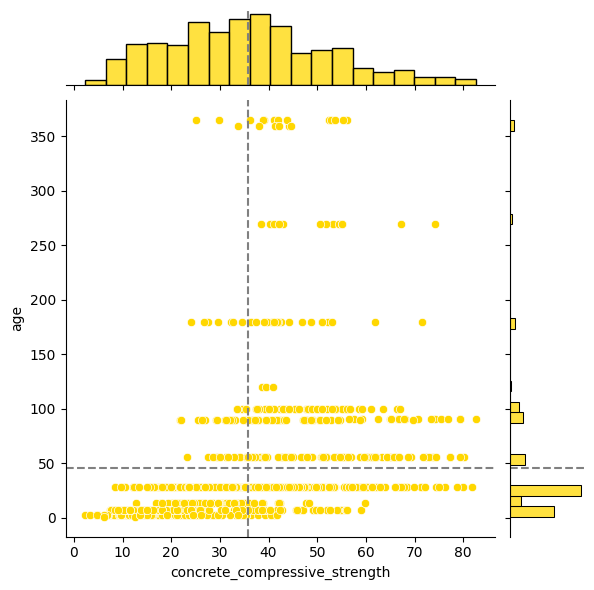

In [22]:
g = sns.JointGrid(data=df, x="concrete_compressive_strength", y="age",)
g.plot(sns.scatterplot, sns.histplot, color = "gold")
g.refline(x=df.concrete_compressive_strength.mean(), y=df.age.mean())

### ```All in One Plot```

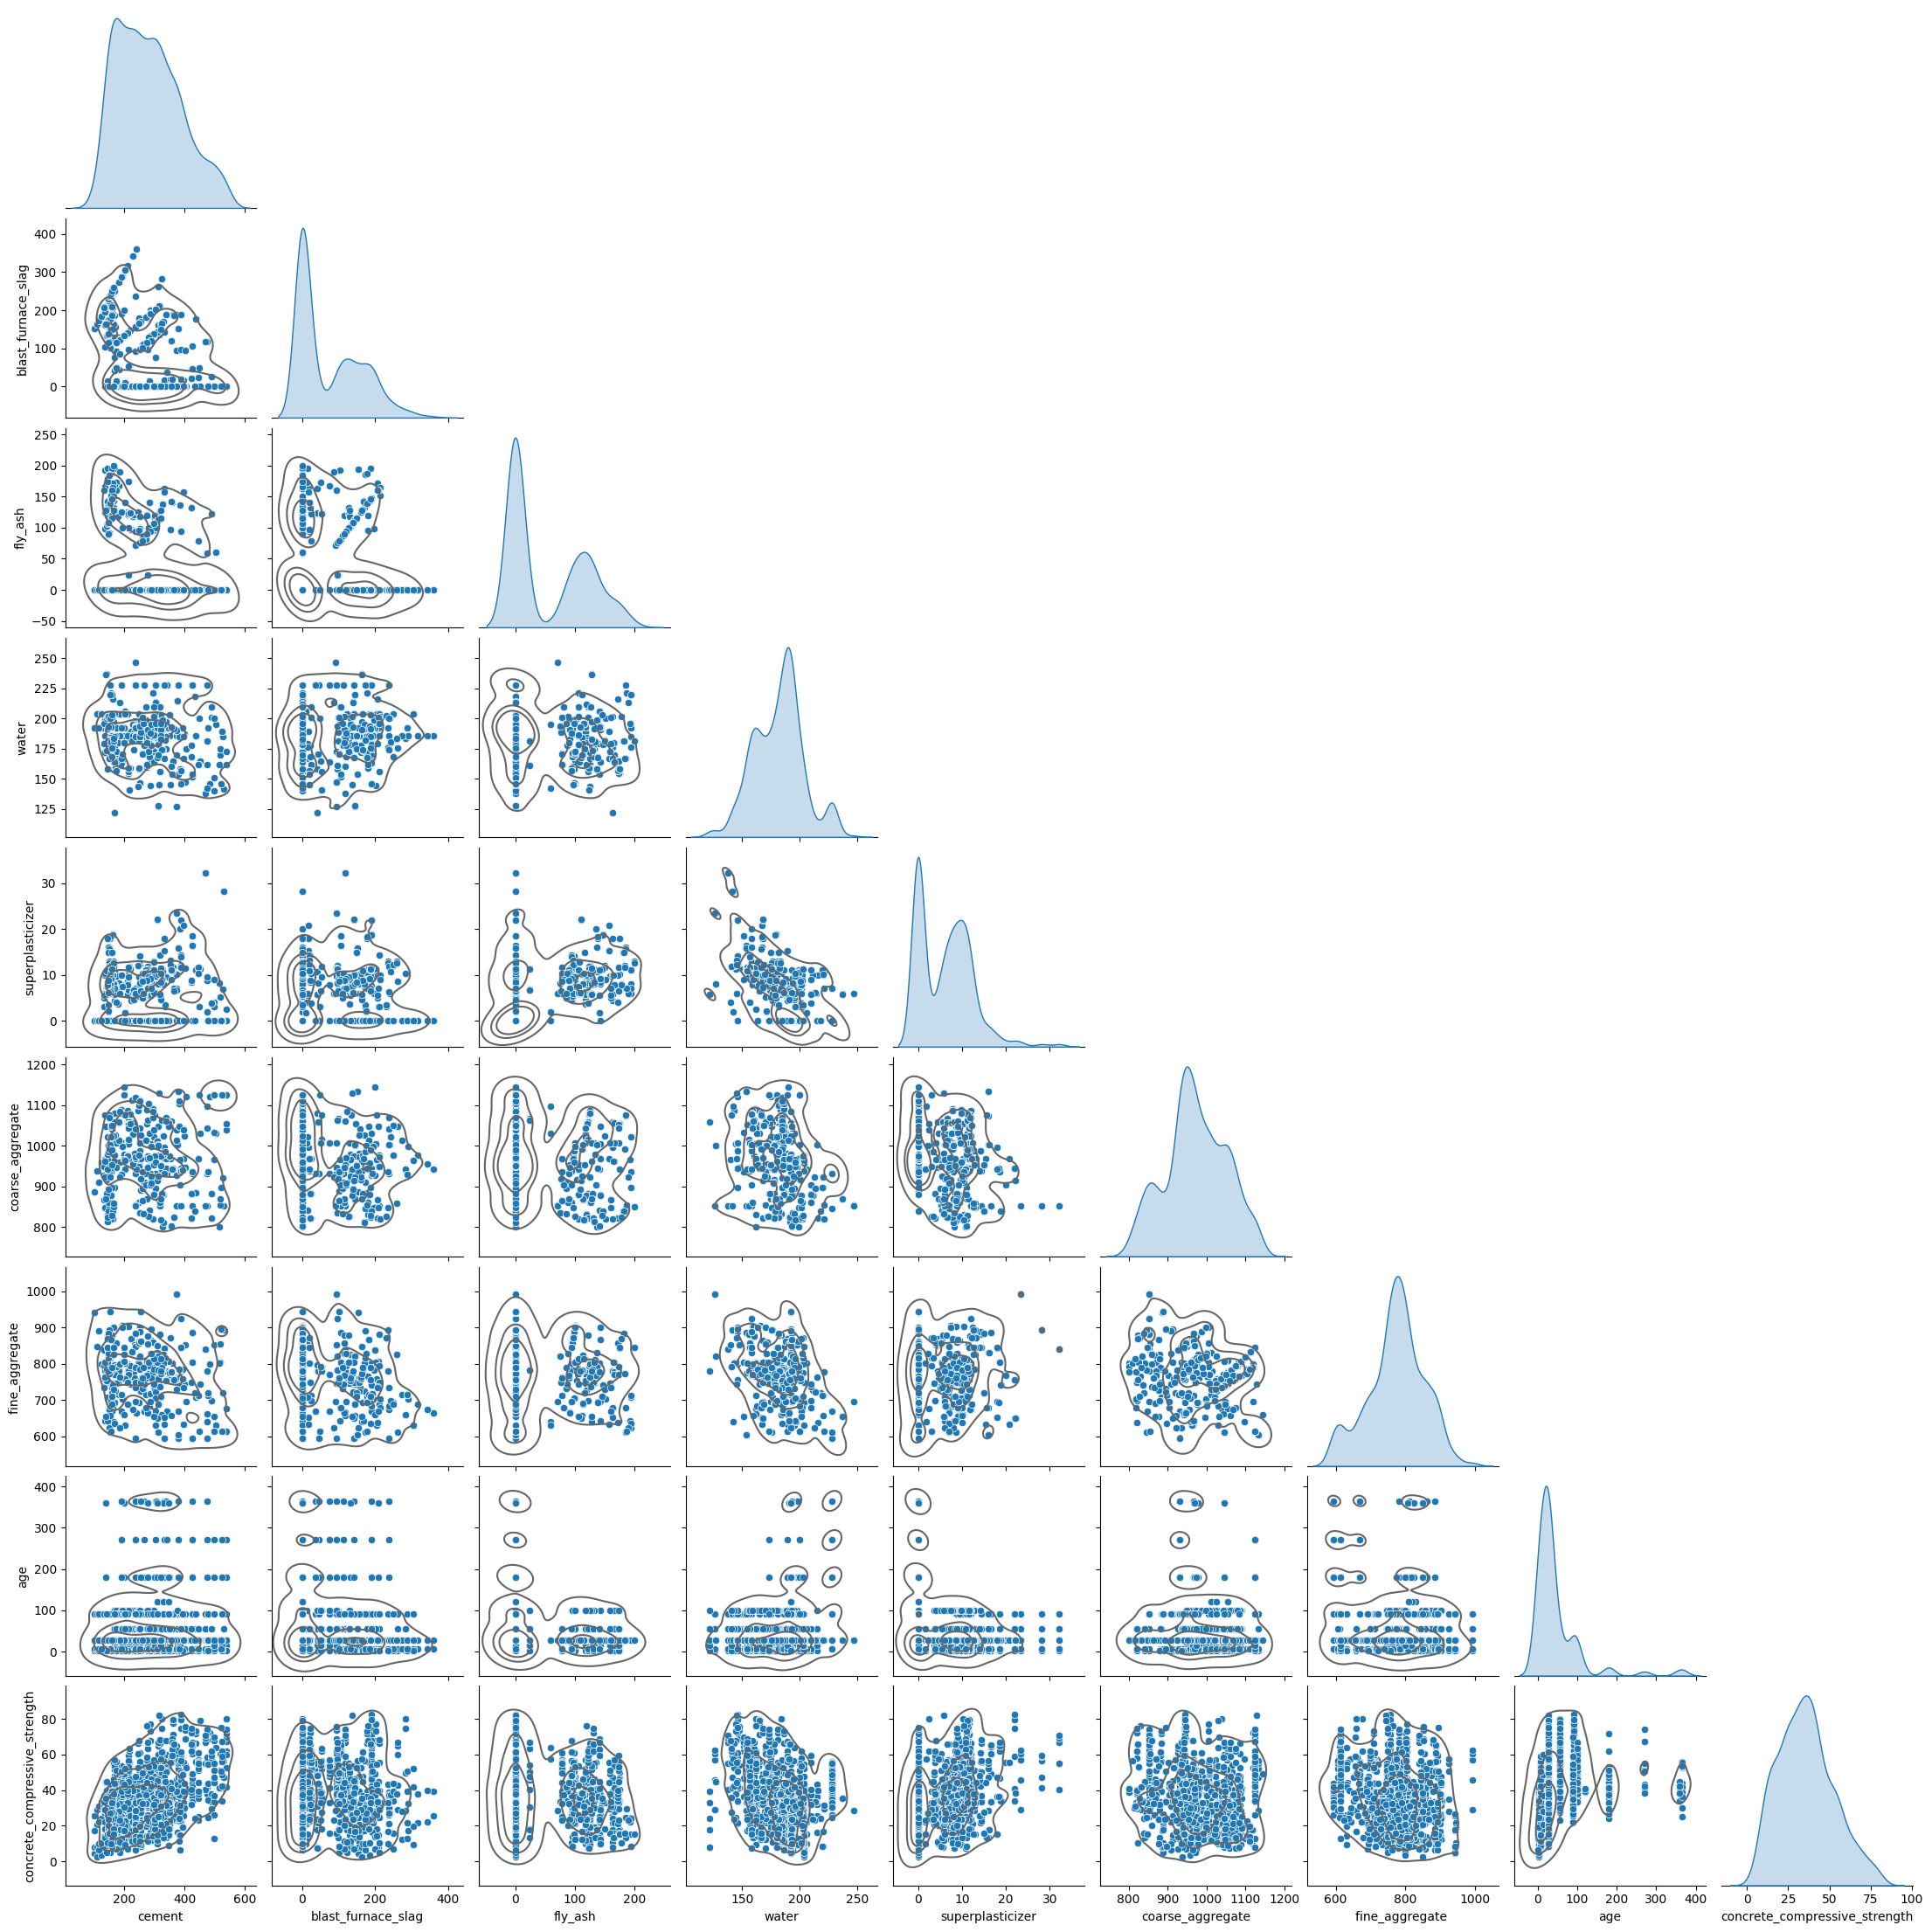

In [23]:
g = sns.pairplot(df, diag_kind="kde", corner = True)
g.map_lower(sns.kdeplot, levels=4, color=".4")

# Outliers Detection and Remove

In [24]:
df = pd.read_csv("/kaggle/input/concrete-compressive-strength-data-set/concrete_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [25]:
y = df["concrete_compressive_strength"].copy()
X = df.drop("concrete_compressive_strength", axis=1).copy()
X_ = X.copy() # for befor after outliers plotting
X

cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate   age  
0               1040.0            676.0   28  
1               1055.0            676.0   28  
2                932.0            594.0  270  
3                932.0            594.0  365  
4                978.4            825.5  360  
...                ...              ...  ...  
1025             870.1            768.3   28  
1026             817.9            813.4   28  
1027             892.4            780.0   28  
1028             989.6            788.9   28  
1029             864.5            761.5   28  

[1030 rows x 8 columns]

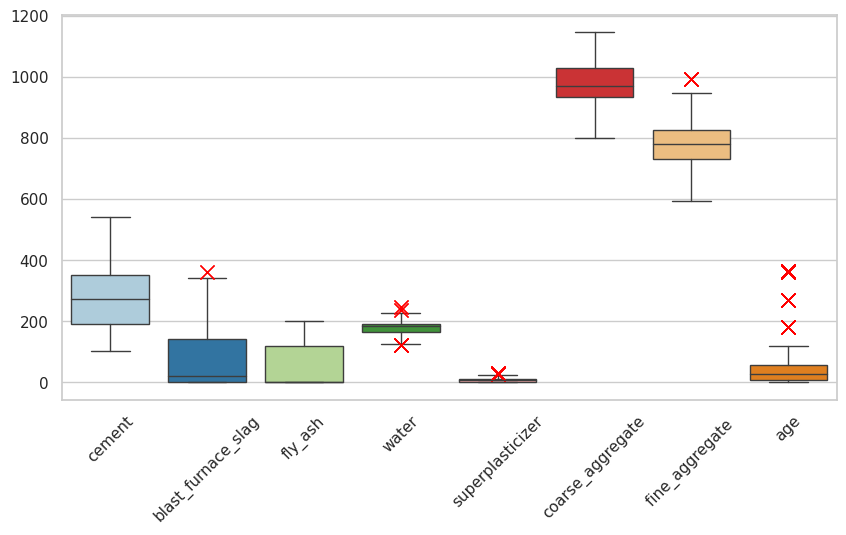

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
box = sns.boxplot(data=X, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
box.set_xticklabels(labels=box.get_xticklabels(),rotation=45);
plt.show()

### ``` Z-Score Method ```

``` firstly, we will use z-score for removing outlier. But we need to know which ones are normally distributed.```

In [27]:
from scipy.stats import shapiro

results = pd.DataFrame(columns=['Statistic', 'p-value', 'Normal Distribution'])
normal_columns = []

for column in X.columns:
    stat, p = shapiro(X[column])
    normal = p > 0.05     
    if normal == True:
        normal_columns.append(column)
        
    results.loc[column] = [stat, p, normal]

print(results)

                    Statistic       p-value  Normal Distribution
cement               0.958960  2.080791e-16                False
blast_furnace_slag   0.812409  5.795508e-33                False
fly_ash              0.761999  4.134551e-36                False
water                0.980393  1.466683e-10                False
superplasticizer     0.866028  9.058676e-29                False
coarse_aggregate     0.982453  8.345865e-10                False
fine_aggregate       0.980672  1.842287e-10                False
age                  0.590704  7.707142e-44                False


``` No feature is suitable.. If one is suitable, we will proceed to remove outliers in the next step (code provided below). ```

In [28]:
#lowest  = X[normal_columns].mean() + (3 * X[normal_columns].std())
#highest = X[normal_columns].mean() - (3 * X[normal_columns].std()) 
#X[normal_columns] = X[normal_columns][(X[normal_columns] > highest) & (X[normal_columns] < lowest)]

### ```IQR (Interquartile Range) Method```

``` secondly, we will  use IQR Method. ```

```It does not require the data to be normal, but it is preferable that the data is not heavily skewed to the right or left (skewness).
This is because then the limits of the IQR can correctly identify outliers.```

In [29]:
from scipy.stats import skew, kurtosis


results = pd.DataFrame(columns=['Skewness', 'Kurtosis', '5% Confidence Level'])
skewed_columns = []
not_skewed_columns = []

for column in X.columns:
    skewness = skew(X[column])
    kurt = kurtosis(X[column])
    
    crit_value = 1.96  # Normal dağılım için

    lower_skew = -crit_value * (6 / len(X)**0.5)
    upper_skew = crit_value * (6 / len(X)**0.5)

    lower_kurt = -crit_value * (24 / len(X)**0.5)
    upper_kurt = crit_value * (24 / len(X)**0.5)

    is_skewed = abs(skewness) > upper_skew or abs(skewness) < lower_skew
    results.loc[column] = [skewness, kurt, is_skewed]

    if is_skewed:
        skewed_columns.append(column)
    else :
        not_skewed_columns.append(column)

print("Skewness and Kurtosis Results:")
print(results)
print("\nSkewed Columns (at 5% significance level):")
print(skewed_columns)

Skewness and Kurtosis Results:
                    Skewness   Kurtosis  5% Confidence Level
cement              0.508739  -0.523948                 True
blast_furnace_slag  0.799550  -0.511532                 True
fly_ash             0.536571  -1.328125                 True
water               0.074520   0.115670                False
superplasticizer    0.905881   1.398608                 True
coarse_aggregate   -0.040161  -0.601932                False
fine_aggregate     -0.252641  -0.107501                False
age                 3.264415  12.104177                 True

Skewed Columns (at 5% significance level):
['cement', 'blast_furnace_slag', 'fly_ash', 'superplasticizer', 'age']


In [30]:
Q1 = X[skewed_columns].quantile(0.25)
Q3 = X[skewed_columns].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indexes = np.where((X[skewed_columns] < lower_bound) | (X[skewed_columns] > upper_bound))

for col in skewed_columns:
    X.loc[outlier_indexes[0], col] = X[col].mean()

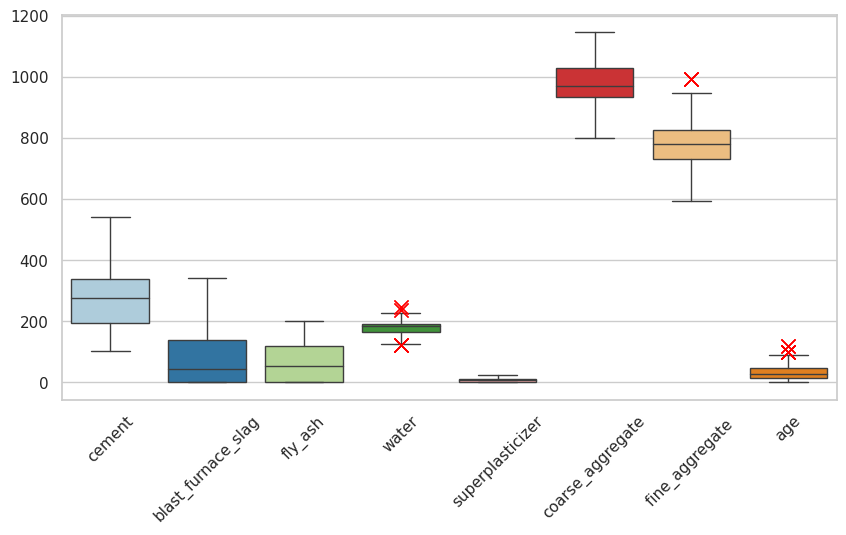

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=X, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
ax.set_xticklabels(labels=box.get_xticklabels(),rotation=45)
plt.show()

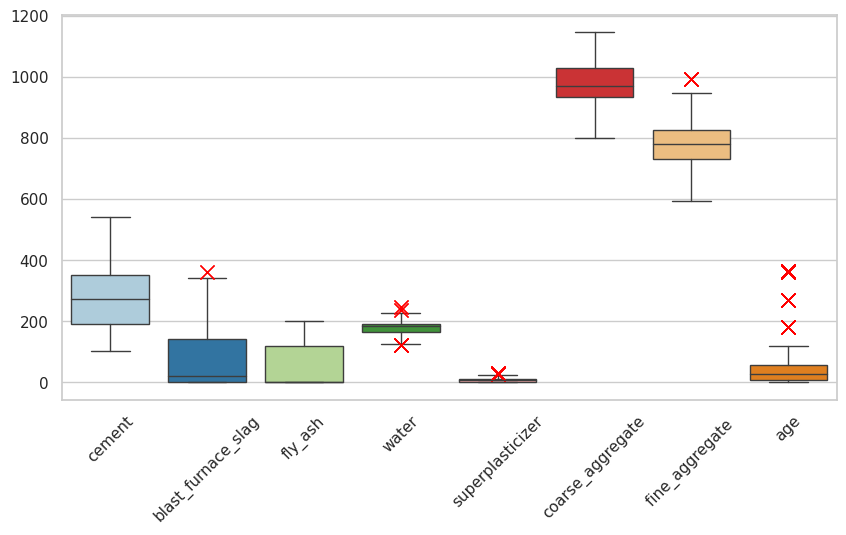

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=X_, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
ax.set_xticklabels(labels=box.get_xticklabels(),rotation=45)
plt.show()

```We changed 71 instances of outliers to means using IQB (Interquartile Range). 
We completely cleaned outliers in blast_furnace_slag and superplasticizer. Outliers in age were smoothed.```

### ```Lastly, we will use IsolationForest algorithems```

In [33]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X[not_skewed_columns])

outliers = model.predict(X[not_skewed_columns]) == -1

for col in X[not_skewed_columns].columns:
    col_mean = X[not_skewed_columns].loc[~outliers, col].mean()
    X[not_skewed_columns].loc[outliers, col] = col_mean


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/tmp/ipykernel_18/2311570223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[not_skewed_columns].loc[outliers, col] = col_mean
/tmp/ipykernel_18/2311570223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[not_skewed_columns].loc[outliers, col] = col_mean
/tmp/ipykernel_18/2311570223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas

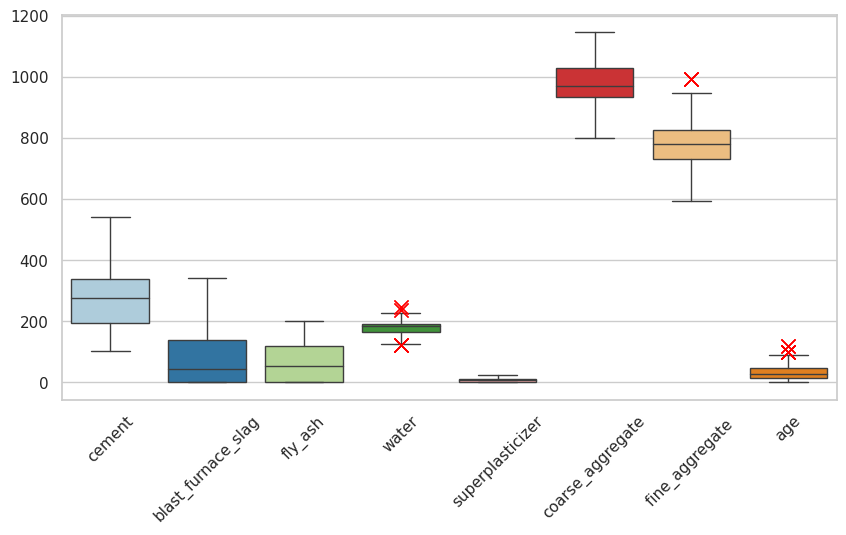

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=X, palette="Paired", linewidth=1, fliersize = 10 , flierprops={"marker": "x",  "markeredgecolor":"red"})
ax.set_xticklabels(labels=box.get_xticklabels(),rotation=45)
plt.show()

```IsolationForest did not work.```

# Feature Engineering

In [35]:
X[X.columns] = X[X.columns] + 1
df.insert(8,'water_cement',df['water']/df['cement'])

## ```boxcox Transformation for not normally distributed features```

In [36]:
from scipy.stats import boxcox

transformed_data = pd.DataFrame()

for column in X.columns:
    transformed_column, lambda_value = boxcox(X[column])
    transformed_data[column] = transformed_column

X[X.columns] = transformed_data

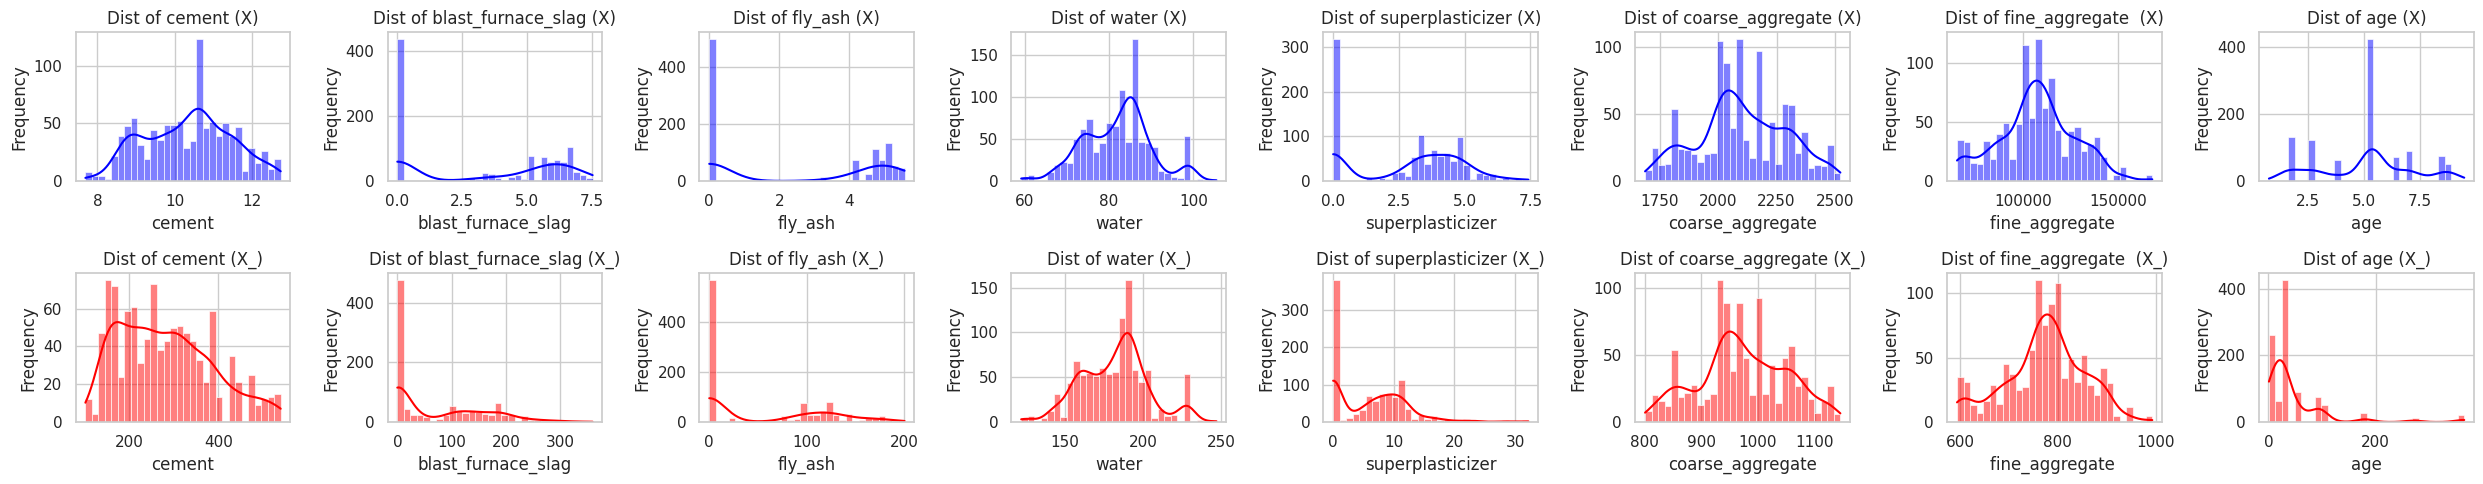

In [37]:
fig, axs = plt.subplots(2, len(X.columns), figsize=(25, 5))

for i, column in enumerate(X.columns):
    sns.histplot(X[column], bins=30, kde=True, ax=axs[0, i], color='blue')
    axs[0, i].set_title(f'Dist of {column} (X)')
    axs[0, i].set_xlabel(column)
    axs[0, i].set_ylabel('Frequency')
    axs[0, i].grid(True)

for i, column in enumerate(X_.columns):
    sns.histplot(X_[column], bins=30, kde=True, ax=axs[1, i], color='red')
    axs[1, i].set_title(f'Dist of {column} (X_)')
    axs[1, i].set_xlabel(column)
    axs[1, i].set_ylabel('Frequency')
    axs[1, i].grid(True)

plt.tight_layout()
plt.show()


### ``` Add to polynomialFeatures to DF ```

In [38]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

df_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns), index=X.index)
X = pd.concat([X, df_poly.loc[:, ~df_poly.columns.isin(df.columns)]], axis=1)

### ``` StandardScaler```

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Modeling

### ``` Let's build a Support Vector Regression.```

In [41]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve

svr = SVR()

In [42]:
param_grid = {
    'kernel': ['linear'], 
    'C': [92, 93, 95] 
}
param_grid = {'C': [92], 'kernel': ['linear']}

grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model_lin = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_lin = cross_val_score(best_model_lin, X_test, y_test, cv = 10, scoring= 'neg_mean_squared_error')
print("RMSE:", (round(np.sqrt(np.abs(svm_scores_lin.mean())), 4)))

Best Parameters: {'C': 92, 'kernel': 'linear'}
RMSE: 6.8964


In [43]:
param_grid = {
    'kernel': ['poly'], 
    'C':  [98, 100, 102],  
    'gamma': [2, 2.5, 3],
    'degree':[1]
}
param_grid = {'C': [100], 'degree': [1], 'gamma': [2], 'kernel': ['poly']}

grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model_poly = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_poly = cross_val_score(best_model_poly, X_test, y_test, cv = 10, scoring= 'neg_mean_squared_error')
print("RMSE:", (round(np.sqrt(np.abs(svm_scores_poly.mean())), 4)))

Best Parameters: {'C': 100, 'degree': 1, 'gamma': 2, 'kernel': 'poly'}
RMSE: 6.8045


In [44]:
param_grid = {
    'kernel': ['rbf'], 
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [0.1, 1, 10, 'scale', 'auto']
}
param_grid = {'C': [100], 'gamma': ['auto'], 'kernel': ['rbf']}

grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model_rbf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_rbf = cross_val_score(best_model_rbf, X_test, y_test, cv = 10, scoring= 'neg_mean_squared_error')
print("RMSE:", (round(np.sqrt(np.abs(svm_scores_rbf.mean())), 4)))

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
RMSE: 6.6776


In [45]:
param_grid = {
    'kernel': ['sigmoid'], 
    'C': [0.1, 1, 10, 100],  
    'gamma': [0.1, 1, 10, 'scale', 'auto'],
    'coef0' :[0 ,0.1, 1, 10]
}
param_grid = {'C': [2.5], 'degree': [1], 'gamma': ['scale'], 'kernel': ['sigmoid']}

grid_search = GridSearchCV(estimator = svr, param_grid = param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model_sigmoid = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

svm_scores_sigmoid = cross_val_score(best_model_sigmoid, X_test, y_test, cv = 10, scoring= 'neg_mean_squared_error')
print("RMSE:", (round(np.sqrt(np.abs(svm_scores_sigmoid.mean())), 4)))

Best Parameters: {'C': 2.5, 'degree': 1, 'gamma': 'scale', 'kernel': 'sigmoid'}
RMSE: 8.5077


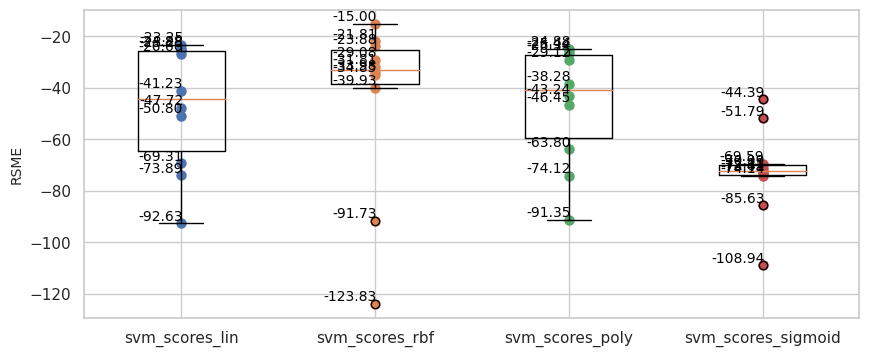

In [46]:
plt.figure(figsize=(10, 4))
plt.plot([1]*10, svm_scores_lin, ".", markersize=13)
plt.plot([2]*10, svm_scores_rbf, ".", markersize=13)
plt.plot([3]*10, svm_scores_poly, ".", markersize=13)
plt.plot([4]*10, svm_scores_sigmoid, ".", markersize=13)


plt.boxplot([svm_scores_lin, svm_scores_rbf, svm_scores_poly, svm_scores_sigmoid], labels=("svm_scores_lin", "svm_scores_rbf", "svm_scores_poly", "svm_scores_sigmoid"))


for i, scores in enumerate([svm_scores_lin, svm_scores_rbf, svm_scores_poly, svm_scores_sigmoid], start=1):
    for j, score in enumerate(scores, start=1):
        plt.text(i+0.01, score+0.01, f'{score:.2f}', color='black', fontsize=10, ha='right', va='bottom')

plt.ylabel("RSME", fontsize=10)
plt.show()


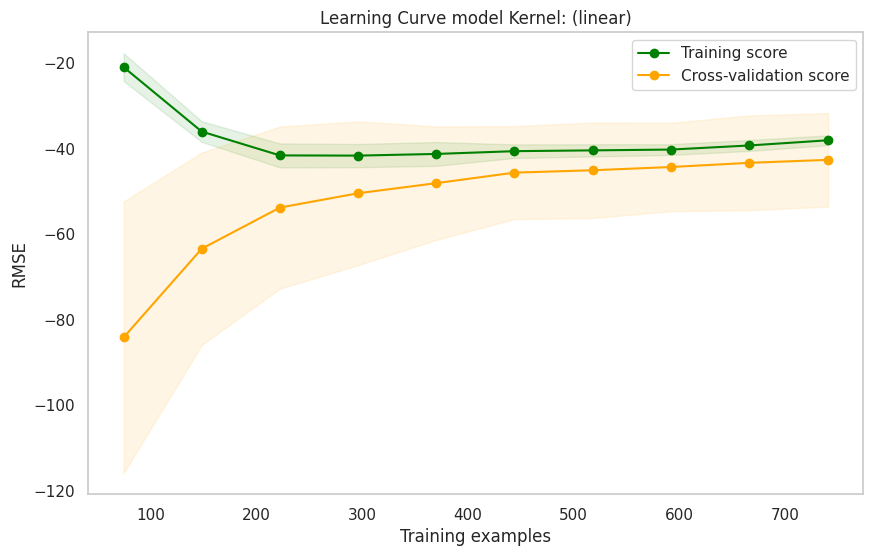

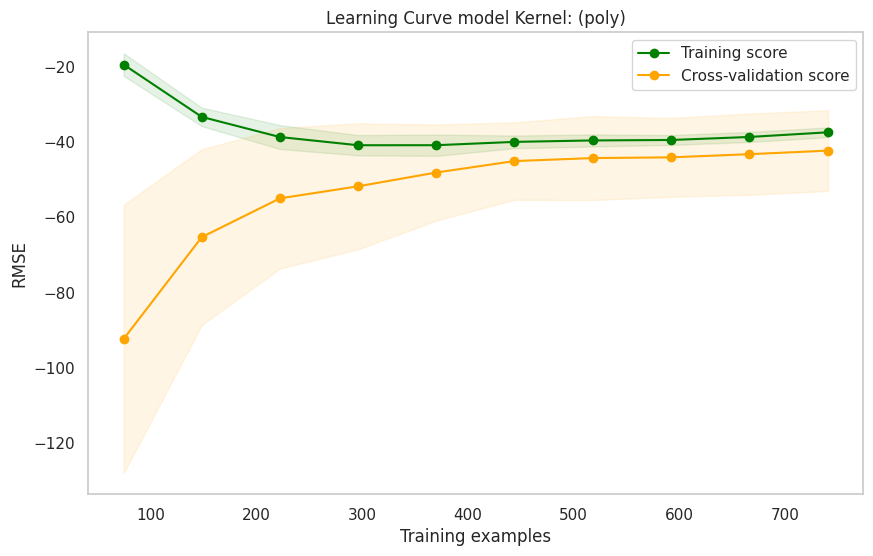

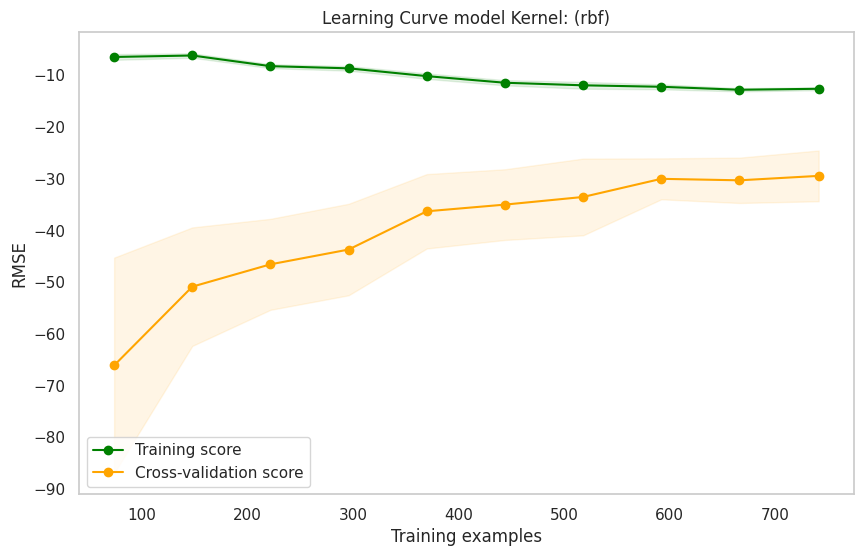

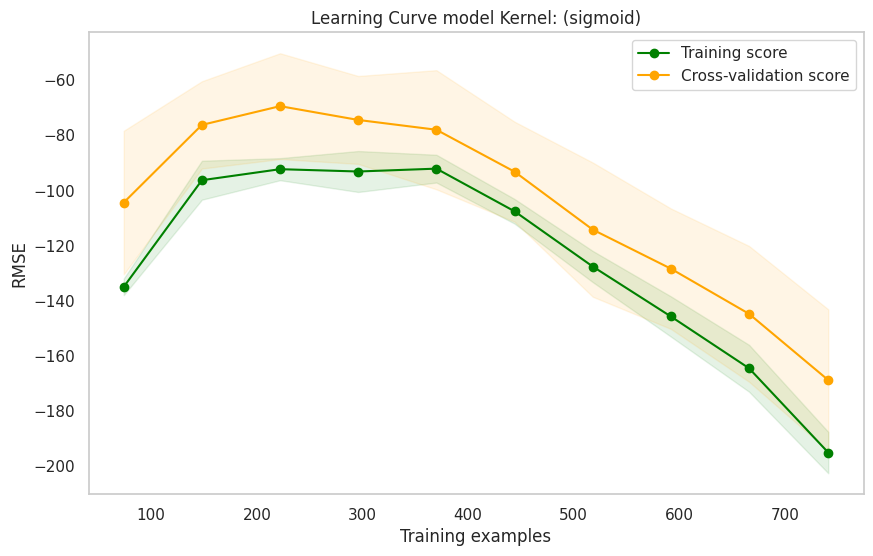

In [47]:
for i in [best_model_lin, best_model_poly, best_model_rbf, best_model_sigmoid]:
    train_sizes, train_scores, test_scores = learning_curve(i, X_train, y_train, cv=10, train_sizes=np.linspace(0.1, 1.0, 10), scoring='neg_mean_squared_error', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)


    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,color="green")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="green", label="Training score")
    plt.plot(train_sizes, test_scores_mean,  'o-', color="orange", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("RMSE")
    plt.title(f"Learning Curve model Kernel: ({i.kernel})")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

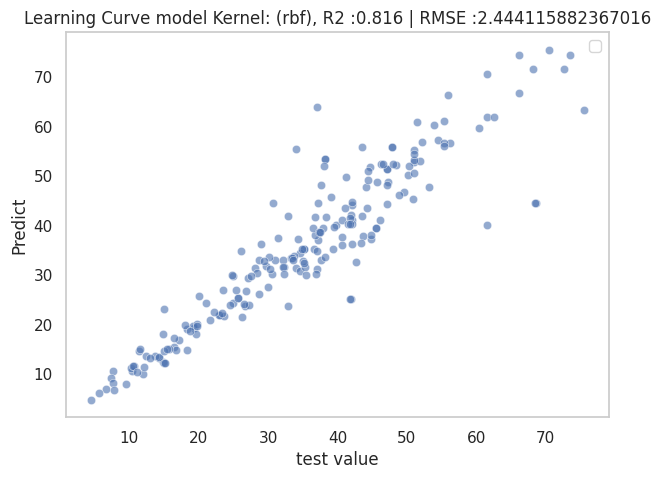

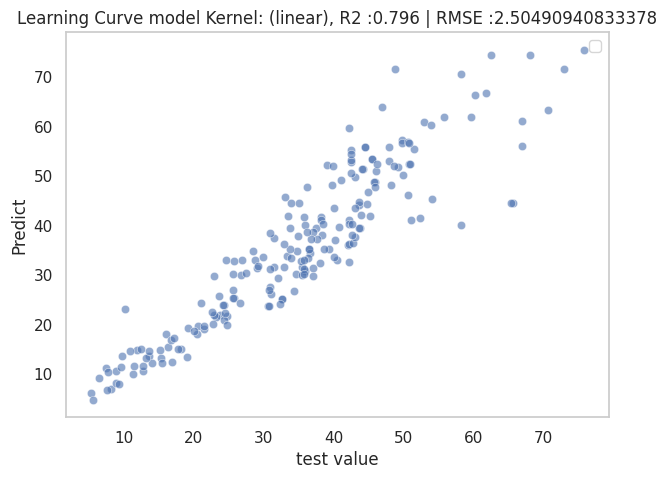

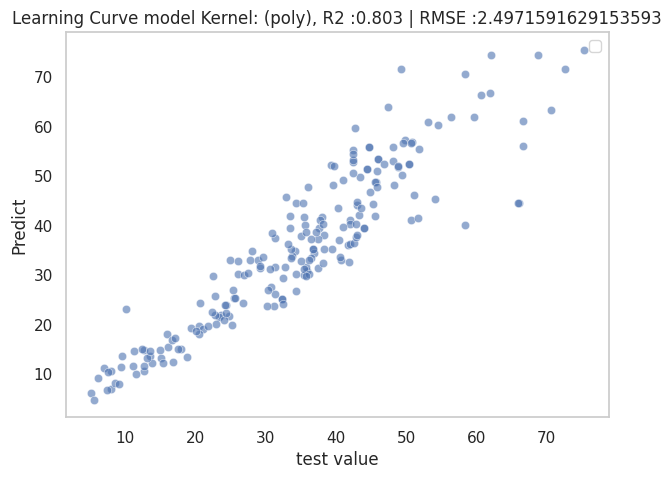

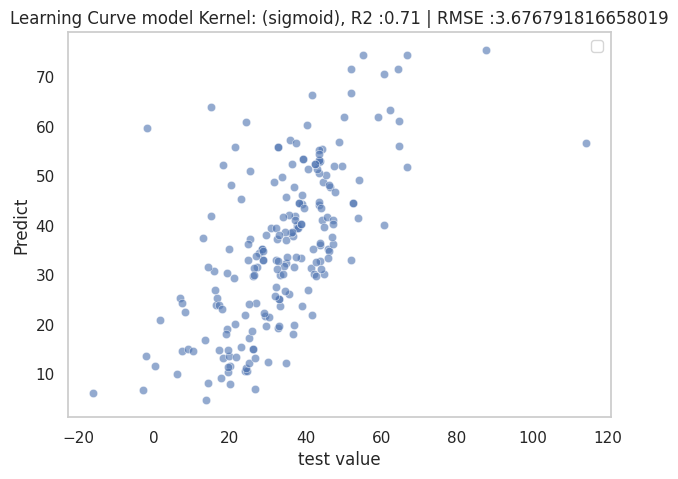

In [48]:
for i in [best_model_rbf, best_model_lin, best_model_poly, best_model_sigmoid]:
    
    y_pred = i.predict(X_test)
    r2 = round(cross_val_score(i, X_test, y_test, cv = 10).mean(), 3)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared = False))
    
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y_pred, y=y_test, alpha =0.6)
    plt.xlabel("test value")
    plt.ylabel("Predict")
    plt.title(f"Learning Curve model Kernel: ({i.kernel}), R2 :{r2} | RMSE :{rmse}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

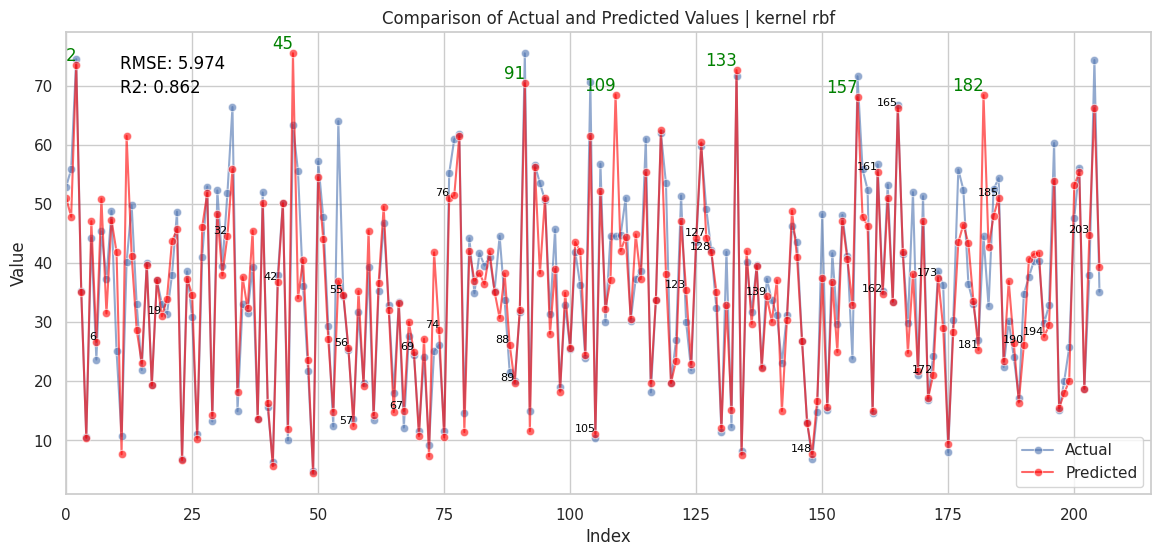

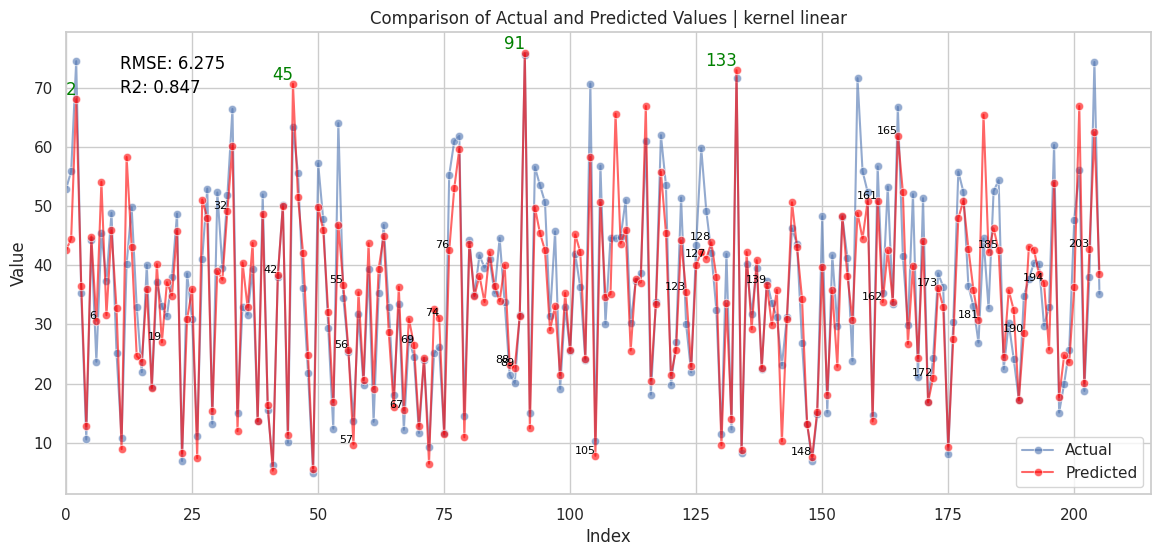

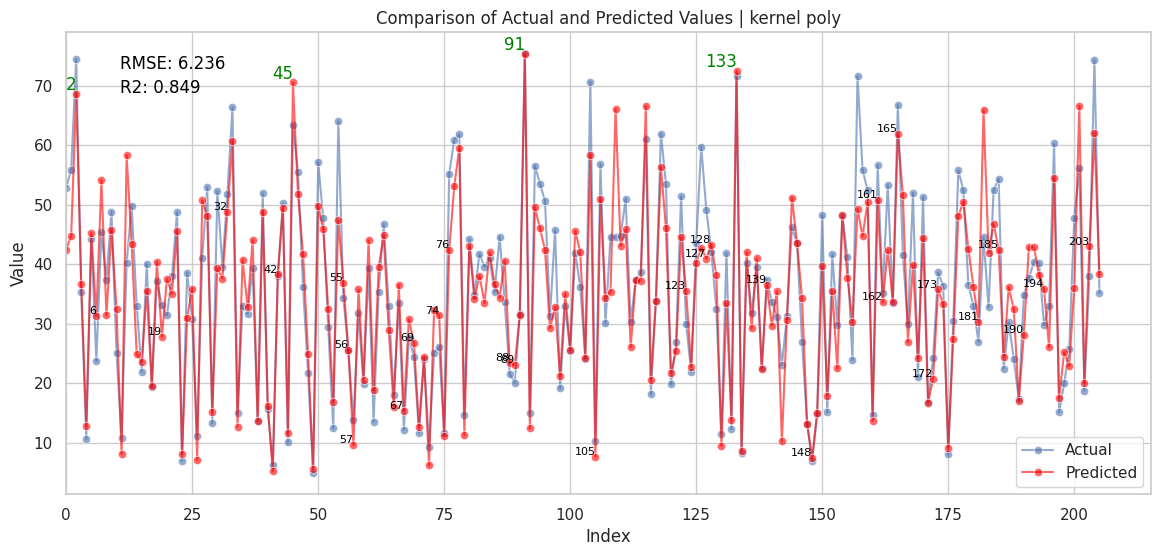

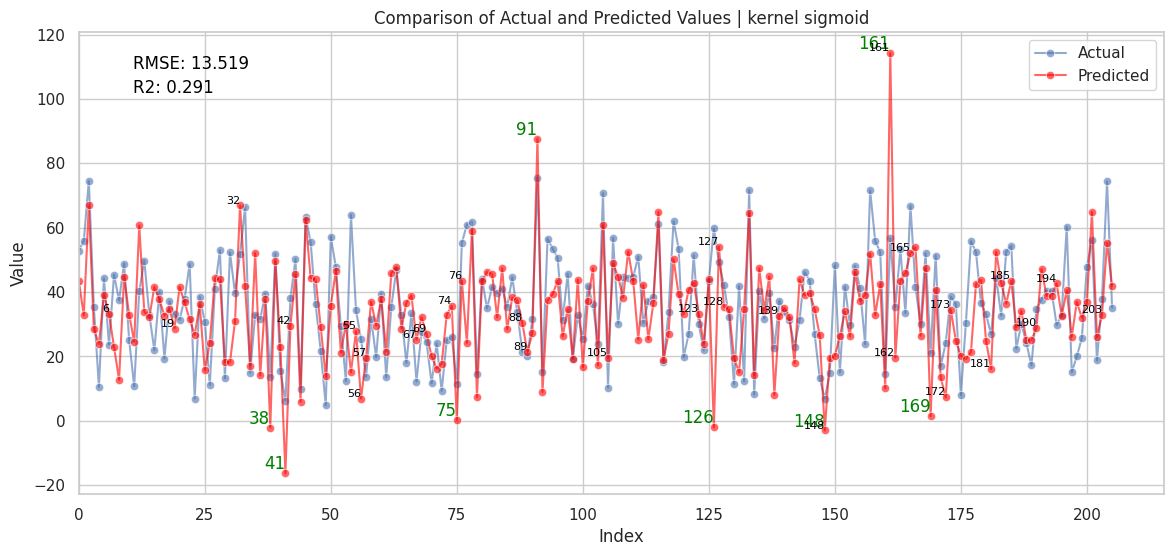

In [49]:
for j in [best_model_rbf, best_model_lin, best_model_poly, best_model_sigmoid]:

    y_pred = j.predict(X_test)

    data = {'Index': range(len(y_test)), 'Actual': y_test, 'Predicted': y_pred}
    data = pd.DataFrame(data)


    def rmse(y_true, y_pred):
        return np.sqrt(np.mean((y_true - y_pred)**2))

    rmse_value = rmse(y_test, y_pred)
    r2 = round(r2_score(y_test, y_pred), 3)

    std_dev = np.std(y_test)
    mean_test = np.mean(y_test)
    outlier_indexes = np.where((y_pred < mean_test - 2 * std_dev) | (y_pred > mean_test + 2 * std_dev))[0]

    plt.figure(figsize=(14, 6))
    sns.lineplot(x='Index', y='Actual', data=data, marker='o', label='Actual', alpha=0.6)
    sns.lineplot(x='Index', y='Predicted', data=data, marker='o', color='red', label='Predicted', alpha=0.6)

    for idx in outlier_indexes:
        plt.text(data.iloc[idx]['Index'], data.iloc[idx]['Predicted'], str(int(data.iloc[idx]['Index'])), color='green', fontsize=12, ha='right', va='bottom')

    for i, row in data.iterrows():
        if i % 10 == 0: 
            plt.text(row['Index'], row['Predicted'], str(int(row['Index'])), color='black', fontsize=8, ha='right', va='bottom')

    plt.text(0.05, 0.95, f'RMSE: {rmse_value:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12, color="black")
    plt.text(0.05, 0.90, f'R2: {r2:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12, color="black")
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(f'Comparison of Actual and Predicted Values | kernel {j.kernel}')
    plt.xlim(left=0)
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

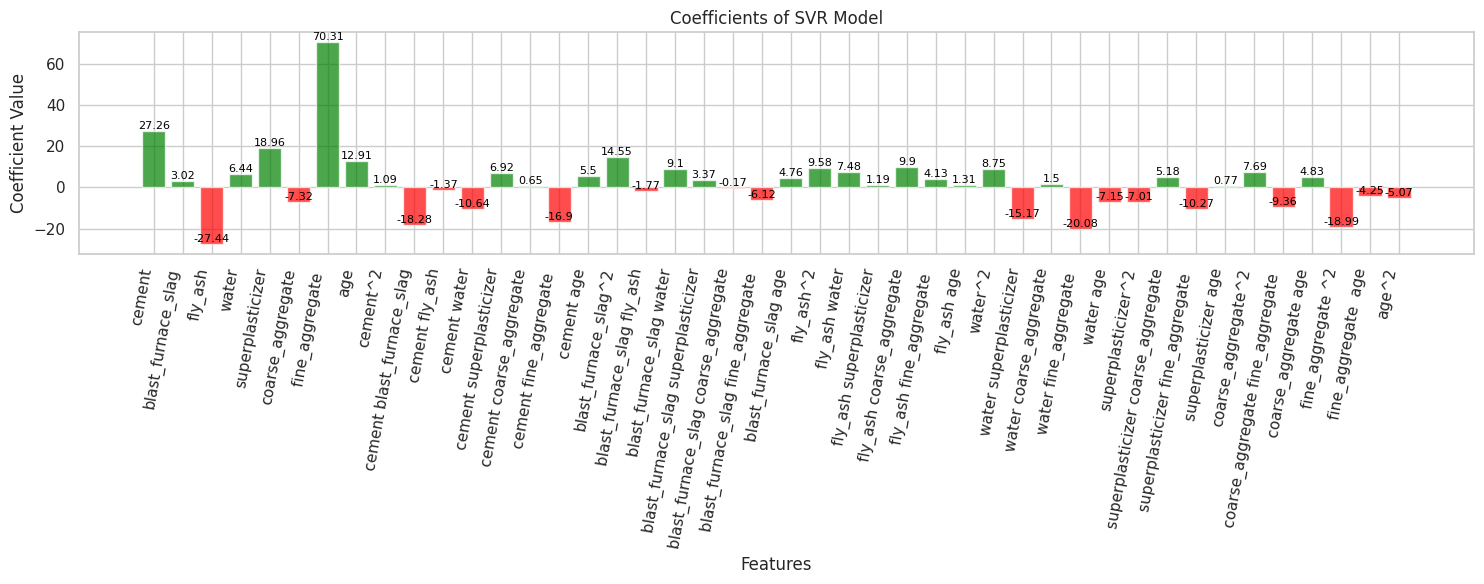

In [50]:
support_vectors = best_model_lin.support_vectors_
weights = best_model_lin.coef_[0]

feature_names = X.columns
colors = ['red' if w < 0 else 'green' for w in weights]
va = ['bottom' if v < 0 else 'top' for v in weights]

plt.figure(figsize=(15, 6))

bars = plt.bar(feature_names, weights, alpha=0.7, color=colors)

for bar, weight in zip(bars, weights):
    yval = round(weight, 2)
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), yval, ha='center', va="bottom", fontsize=8, color='black')

plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of SVR Model')
plt.xticks(rotation=80, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Stochastic Gradient Descent with SVR

## Lastly, we will building a Stochastic Gradient Descent model with penalty = "epsilon_insensitive" -> it's linear Support Vector Regression.

In [51]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()

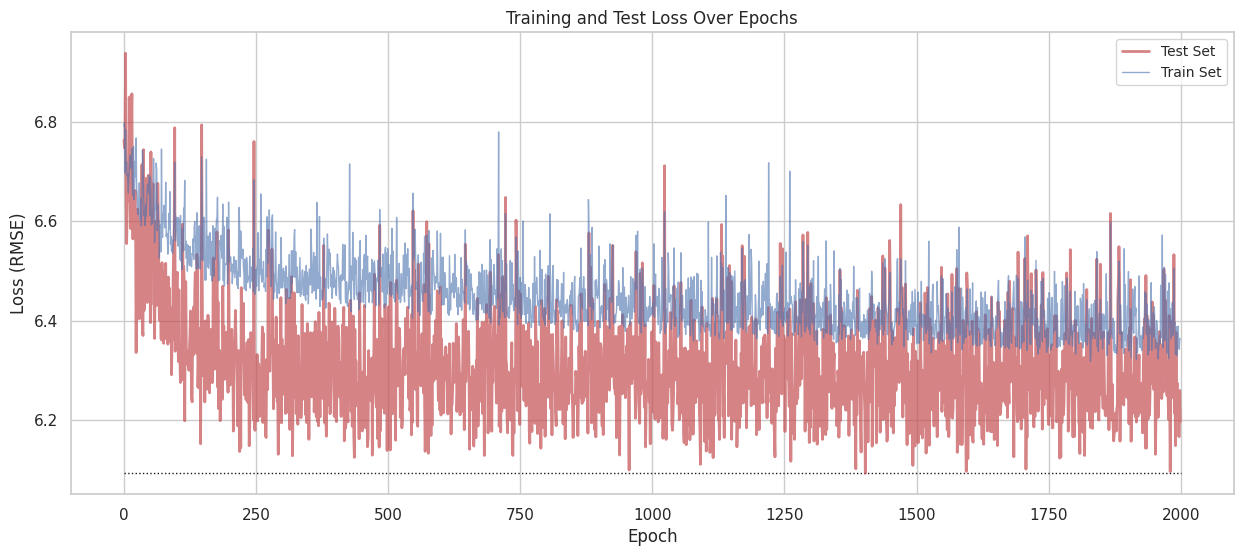

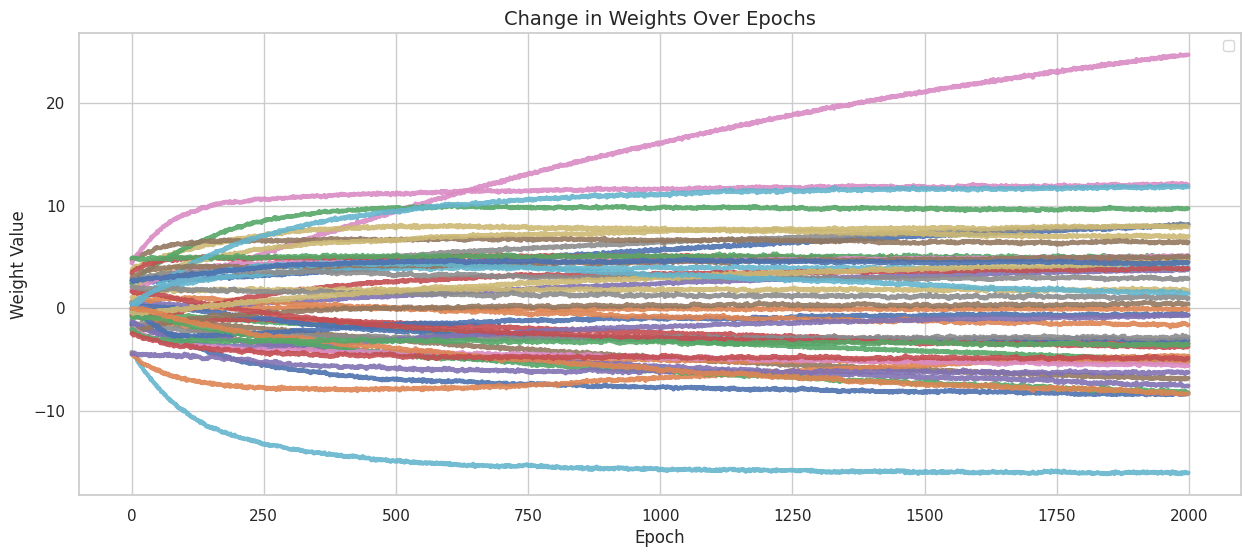

Minimum Test Loss (RMSE): 6.0934
Number of Best Epochs: 1403
Best Hyperparameters: {'alpha': 0.0001, 'eta0': 0.01, 'l1_ratio': 0.5, 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'penalty': 'elasticnet'}


In [52]:
param_grid = {
    'loss' :['epsilon_insensitive'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],  
    'l1_ratio': [0, 0.1, 0.2, 0.5, 0.7, 1.0], 
    'max_iter': [1000, 2000, 5000, 10000],  
    'eta0': [0.01, 0.1],  
    'learning_rate': ['constant', 'optimal', 'invscaling'],  
    'penalty' : ['l1', 'l2', 'elasticnet']
}
param_grid = {'loss' :['epsilon_insensitive'], 'alpha': [0.0001],
              'l1_ratio': [0.5], 'max_iter': [1000], 'eta0': [0.01], 
              'learning_rate': ['constant'], 'penalty' : ['elasticnet']
}

grid_search = GridSearchCV(estimator=sgd_reg, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_sgd_reg = grid_search.best_estimator_

n_epochs = 2000
train_loss, test_loss = [], []
weights = []

for epoch in range(n_epochs):
    best_sgd_reg.partial_fit(X_train, y_train)
    
    train_pred = best_sgd_reg.predict(X_train)
    test_pred  = best_sgd_reg.predict(X_test)
    
    train_loss.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_loss.append(np.sqrt(mean_squared_error(y_test, test_pred))),
    
    weights.append(best_sgd_reg.coef_.copy()) 

best_epoch = np.argmin(test_loss)
best_test_loss = round(test_loss[best_epoch], 4)
weights = np.array(weights)  

plt.figure(figsize=(15, 6))
plt.plot([0, n_epochs], [best_test_loss, best_test_loss], "k:", linewidth=1)
plt.plot(test_loss, "r-", linewidth=2, label="Test Set", alpha=0.7)
plt.plot(train_loss, "b-", linewidth=1, label="Train Set", alpha=0.6)
plt.legend(loc="upper right", fontsize=10)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss (RMSE)", fontsize=12)
plt.title("Training and Test Loss Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(15, 6))
for feature_index in range(weights.shape[1]):
    plt.plot(weights[:, feature_index], alpha=0.9, linewidth=3)

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.title('Change in Weights Over Epochs', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()


print("Minimum Test Loss (RMSE):", best_test_loss)
print("Number of Best Epochs:", best_epoch)
print("Best Hyperparameters:", grid_search.best_params_)


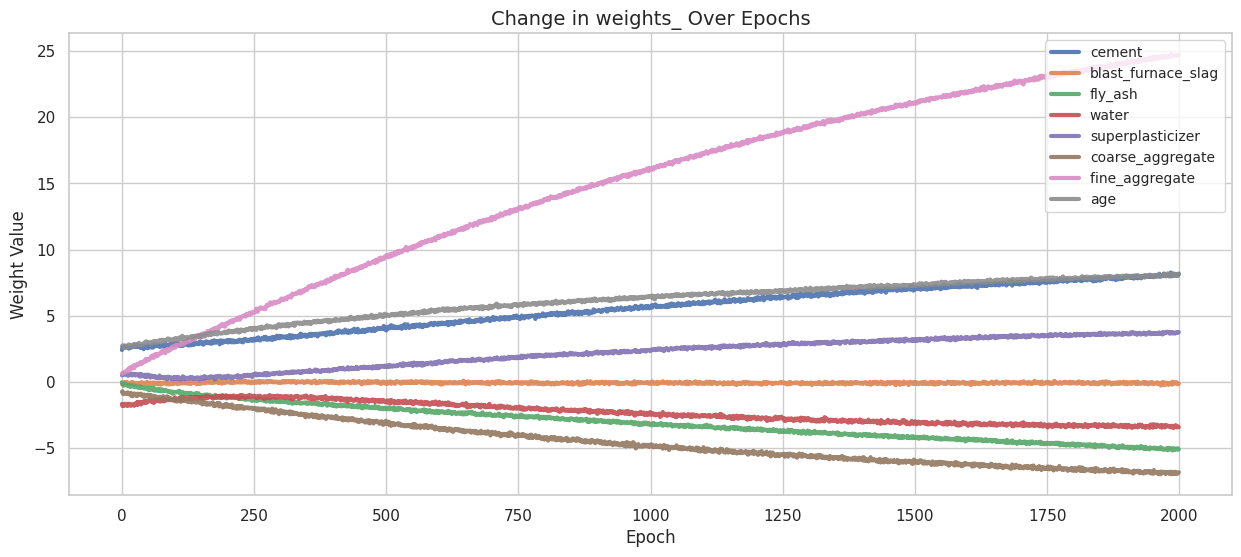

In [53]:
feature_names = X.columns[:8]
weights_ = np.array(weights[:,:8]).copy()  

plt.figure(figsize=(15, 6))
for feature_index in range(weights_.shape[1]):
    plt.plot(weights_[:, feature_index], alpha=0.9, linewidth=3, label=feature_names[feature_index])

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Weight Value', fontsize=12)
plt.title('Change in weights_ Over Epochs', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True)
plt.show()

In [54]:
for epoch in range(500):
    best_sgd_reg.partial_fit(X_train, y_train)

y_test_pred  = best_sgd_reg.predict(X_test)

print("\n##--500th epoch Test Result--##")
print("\nTest Scores")
print("RSME:", np.sqrt(mean_squared_error(y_test, y_test_pred)))



##--500th epoch Test Result--##

Test Scores
RSME: 6.263554620967676
